Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

##Importing Skin Cancer Data

##Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import PIL
from tensorflow import keras
from tensorflow.python.keras import layers
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from glob import glob

In [ ]:
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D

###Mounting the google drive


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
from pathlib import Path
import pathlib

Mounted at /content/gdrive


In [ ]:
from pathlib import Path
import pathlib

In [ ]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("/content/gdrive/My Drive/Train")
data_dir_test = pathlib.Path("/content/gdrive/My Drive/Test")

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


###Load using keras.preprocessing
Let's load these images off disk using the helpful image_dataset_from_directory utility.

###Create a dataset
Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


##Visualize the data

In [ ]:
# Image Rescaling. The 1./255 is to convert from unit8 to float32 in range[0, 1]
image_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_data_gen = image_generator.flow_from_directory(directory=data_dir_train,
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    target_size=(img_height, img_width),
                                                    classes=list(class_names),
                                                    class_mode='categorical')

Found 6739 images belonging to 9 classes.


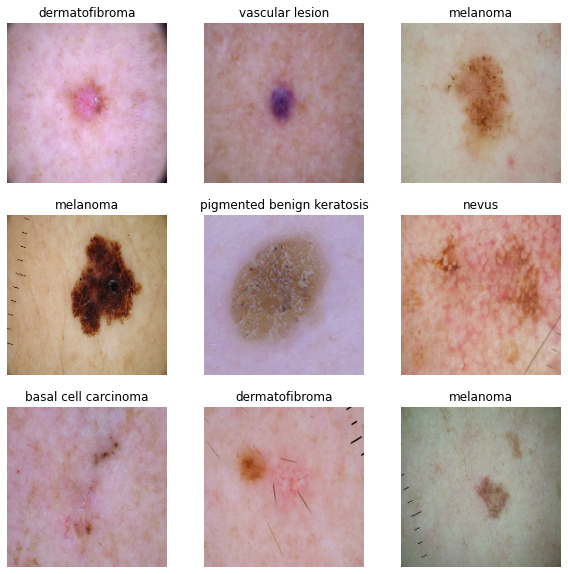

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

##Create CNN Model

In [ ]:
preprocessing_layers = [
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3))
]

input_shape = (img_height,img_width,3)
lr = 1e-5
init = 'normal'
activ = 'relu'

model = Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(32, 3, padding='same', activation=activ),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation=activ),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation=activ),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation=activ),
    layers.Dense(9, activation='softmax')
])

In [ ]:
optimizer = 'adam'
loss_fn = "sparse_categorical_crossentropy"


## Compile the Model

In [ ]:
model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

####Build Model

In [ ]:
model.build

<bound method Sequential.build of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7ff8f20ed290>>

##Train the Model


In [ ]:

os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'


In [ ]:
epochs = 20
batch_size = 32

history = model.fit(
  train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 680s 828ms/step - loss: 1.9814 - accuracy: 0.2415 - val_loss: 1.7218 - val_accuracy: 0.3393
Epoch 2/20
169/169 [==============================] - 7s 40ms/step - loss: 1.4610 - accuracy: 0.4442 - val_loss: 1.3109 - val_accuracy: 0.4996
Epoch 3/20
169/169 [==============================] - 7s 39ms/step - loss: 1.2284 - accuracy: 0.5404 - val_loss: 1.2424 - val_accuracy: 0.5412
Epoch 4/20
169/169 [==============================] - 7s 39ms/step - loss: 1.0661 - accuracy: 0.6122 - val_loss: 1.1286 - val_accuracy: 0.5887
Epoch 5/20
169/169 [==============================] - 7s 40ms/step - loss: 0.9223 - accuracy: 0.6675 - val_loss: 1.0613 - val_accuracy: 0.6214
Epoch 6/20
169/169 [==============================] - 7s 40ms/step - loss: 0.7517 - accuracy: 0.7313 - val_loss: 0.9117 - val_accuracy: 0.6852
Epoch 7/20
169/169 [==============================] - 7s 40ms/step - loss: 0.6695 - accuracy: 0.7580 - val_loss: 0.9520 - val_accuracy: 0.6

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 128)       0

### Visualizing training results

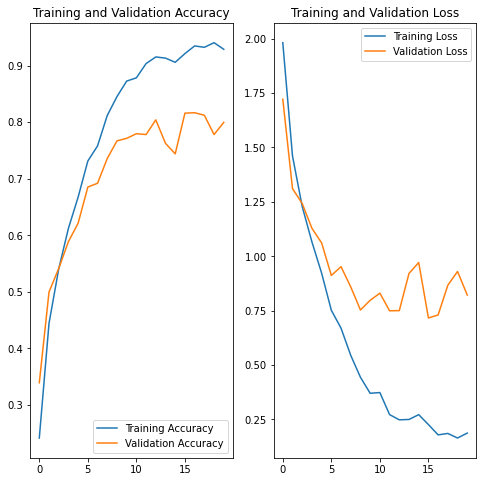

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Analysis
As per the above data:</br>
Training Accuracy   = 0.92</br>
Validation Accuracy = 0.79</br>
Training Loss       = 0.18</br>
Validation Loss     = 0.82</br>

There is overfitting of data

##Argumentation

In [ ]:
data_augmentation = keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

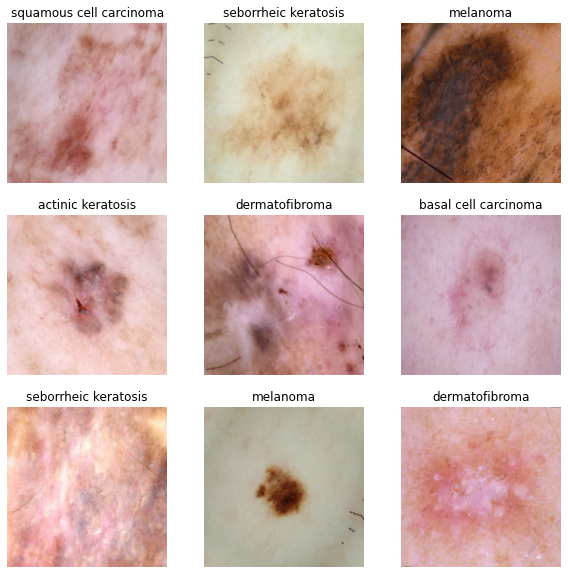

In [ ]:
for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    first_image = images[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(
            tf.expand_dims(images[i], 0), training=True
        )
        plt.imshow(augmented_image[0].numpy().astype("int32"))
        plt.title(class_names[int(labels[i])])
        plt.axis("off")

##Create and Train Model

In [ ]:
## use Dropout layer if there is an evidence of overfitting in your findings
model = Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.15),
    layers.Dense(128, activation='relu'),
    layers.Dense(9, activation='softmax')
])

In [ ]:
#Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
## train your model for 20 epochs
history =  model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 8s 43ms/step - loss: 1.9264 - accuracy: 0.2674 - val_loss: 1.8335 - val_accuracy: 0.3304
Epoch 2/20
169/169 [==============================] - 7s 42ms/step - loss: 1.5289 - accuracy: 0.4062 - val_loss: 1.5405 - val_accuracy: 0.4261
Epoch 3/20
169/169 [==============================] - 7s 43ms/step - loss: 1.3955 - accuracy: 0.4666 - val_loss: 1.3729 - val_accuracy: 0.4959
Epoch 4/20
169/169 [==============================] - 7s 43ms/step - loss: 1.3135 - accuracy: 0.5004 - val_loss: 1.2800 - val_accuracy: 0.5271
Epoch 5/20
169/169 [==============================] - 7s 42ms/step - loss: 1.2625 - accuracy: 0.5172 - val_loss: 1.2487 - val_accuracy: 0.5345
Epoch 6/20
169/169 [==============================] - 7s 42ms/step - loss: 1.1915 - accuracy: 0.5399 - val_loss: 1.1342 - val_accuracy: 0.5746
Epoch 7/20
169/169 [==============================] - 7s 42ms/step - loss: 1.1154 - accuracy: 0.5799 - val_loss: 1.1556 - val_accuracy: 0.5575
Epoch 8/20

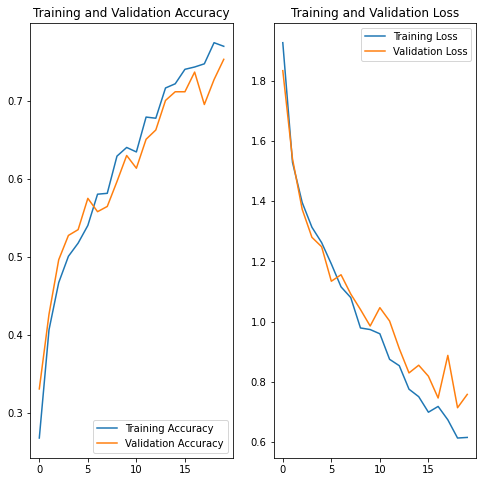

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##Analaysis:-
Training Accuracy = 0.7695</br>
Validation Accuracy = 0.7528</br>
Training Loss = 0.6154</br>
Validation Loss = 0.7528</br>

###The loss seems to be more in both Training and Validation

## Class Distrubution in Train Set

In [ ]:
total_image_count = len(list(data_dir_train.glob('**/*/*.jpg')))
perc_class = {}
for name in class_names:
    perc_class[name] = round((len(list(data_dir_train.glob('{0}/*.jpg'.format(name)))) / total_image_count)*100,2)
df = pd.DataFrame(list(perc_class.items()), columns=['Class', 'Distribution Percentage'])

df

,Class,Distribution Percentage
0,actinic keratosis,1.69
1,basal cell carcinoma,5.58
2,dermatofibroma,1.41
3,melanoma,6.50
4,nevus,5.30
5,pigmented benign keratosis,6.86
6,seborrheic keratosis,1.14
7,squamous cell carcinoma,2.69
8,vascular lesion,2.06


In [ ]:
# Get the distribution of data for each class
total_count = 0
data_dict = {}
for name in class_names:
    data_dict[name] = len(list(data_dir_train.glob('{0}/*.jpg'.format(name))))
    total_count += len(list(data_dir_train.glob('{0}/*.jpg'.format(name))))

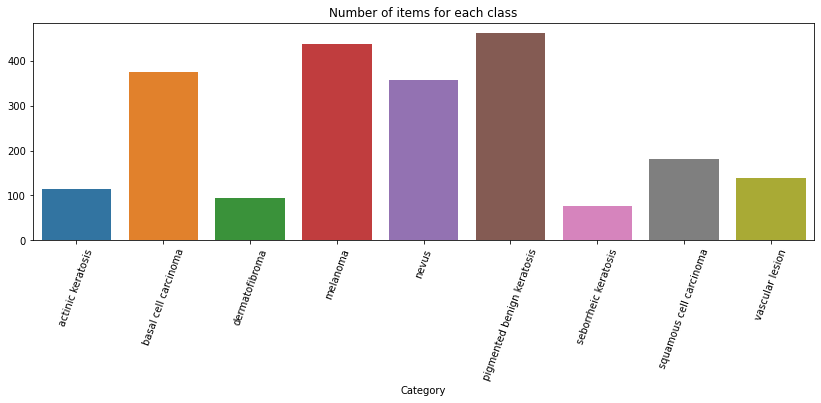

In [ ]:
# Plot the distribution of data using bar plot
f, ax = plt.subplots(1,1, figsize=(14,4))
g = sns.barplot(x=list(data_dict.keys()), y = list(data_dict.values()))
g.set_title("Number of items for each class")
g.set_xlabel("Category")
plt.xticks(rotation=70)
plt.show()

##TODO ANALYSIS
- Which class has the least number of samples?</br>
==> **seborrheic keratosis**
- Which classes dominate the data in terms proportionate number of samples?</br>
==> **pigmented benign keratosis**

##Rectify class imbalace 

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###Import Augmentor

In [ ]:
path_to_training_dataset="/content/gdrive/MyDrive/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF8DC29BE90>: 100%|██████████| 500/500 [00:20<00:00, 24.62 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF8DC3A0110>: 100%|██████████| 500/500 [00:21<00:00, 22.90 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF8DC3A0CD0>: 100%|██████████| 500/500 [00:22<00:00, 22.56 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FF8DC17C310>: 100%|██████████| 500/500 [01:44<00:00,  4.80 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7FF8DC365CD0>: 100%|██████████| 500/500 [01:23<00:00,  6.01 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FF8DC2E4790>: 100%|██████████| 500/500 [00:19<00:00, 26.06 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FF9FA4B3A50>: 100%|██████████| 500/500 [00:41<00:00, 11.95 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF8DC254950>: 100%|██████████| 500/500 [00:17<00:00, 27.97 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FF8DC361590>: 100%|██████████| 500/500 [00:18<00:00, 27.06 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
# Get the total number of samples newly added using Augumentor
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

9000


##Lets see the distribution of augmented data after adding new images to the original training data.


In [ ]:
# Get the list of paths that originally had without Augumentor
org_path_list = [x for x in glob(os.path.join(data_dir_train, '*','*.jpg'))]
org_path_list

['/content/gdrive/My Drive/Train/actinic keratosis/ISIC_0025953.jpg',
 '/content/gdrive/My Drive/Train/actinic keratosis/ISIC_0025780.jpg',
 '/content/gdrive/My Drive/Train/actinic keratosis/ISIC_0025957.jpg',
 '/content/gdrive/My Drive/Train/actinic keratosis/ISIC_0025825.jpg',
 '/content/gdrive/My Drive/Train/actinic keratosis/ISIC_0025803.jpg',
 '/content/gdrive/My Drive/Train/actinic keratosis/ISIC_0026149.jpg',
 '/content/gdrive/My Drive/Train/actinic keratosis/ISIC_0025992.jpg',
 '/content/gdrive/My Drive/Train/actinic keratosis/ISIC_0026194.jpg',
 '/content/gdrive/My Drive/Train/actinic keratosis/ISIC_0026171.jpg',
 '/content/gdrive/My Drive/Train/actinic keratosis/ISIC_0026212.jpg',
 '/content/gdrive/My Drive/Train/actinic keratosis/ISIC_0026525.jpg',
 '/content/gdrive/My Drive/Train/actinic keratosis/ISIC_0026457.jpg',
 '/content/gdrive/My Drive/Train/actinic keratosis/ISIC_0026040.jpg',
 '/content/gdrive/My Drive/Train/actinic keratosis/ISIC_0026468.jpg',
 '/content/gdrive/My

In [ ]:
# Get the class names for each paths of original data
lesion_list_org = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
print(len(lesion_list_org))

2239


In [ ]:
# Add both Path list and class names of original data
dataframe_dict_org = dict(zip(org_path_list, lesion_list_org))

In [ ]:
# Create a dataframe using original data
df1 = pd.DataFrame(list(dataframe_dict_org.items()),columns = ['Path','Label'])
len(df1)

2239

In [ ]:
# Get the list of paths that new added using Augumentor
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/My Drive/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029713.jpg_7fa86e0b-ad2e-47e2-8313-82862c997cea.jpg',
 '/content/gdrive/My Drive/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031823.jpg_ed5b7ccc-cd1c-4b0e-b975-adc9238af01f.jpg',
 '/content/gdrive/My Drive/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026709.jpg_7a9c9b2d-4a70-41b7-815a-f66d5d29d2a3.jpg',
 '/content/gdrive/My Drive/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030408.jpg_c6101815-c921-44e5-bde3-5a377aeace26.jpg',
 '/content/gdrive/My Drive/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0033705.jpg_901152aa-2639-4e9d-b428-b9ac8909c74d.jpg',
 '/content/gdrive/My Drive/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029041.jpg_4b022aa9-d2d8-4c3b-84b1-cc59af574f82.jpg',
 '/content/gdrive/My Drive/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029830.jpg_98455f28-2dd0-4816-b932-45b2

In [ ]:
# Get the class names for each paths of newly added data
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [ ]:
# Add both Path list and class names of newly added data
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
# Create a dataframe using newly added data using Augumentor
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
# Merge orginal data with newly added data
new_df = df1.append(df2)

In [ ]:
# Show the dsitribution of data after merging
new_df['Label'].value_counts()

pigmented benign keratosis    1462
melanoma                      1438
basal cell carcinoma          1376
nevus                         1357
squamous cell carcinoma       1181
vascular lesion               1139
actinic keratosis             1114
dermatofibroma                1095
seborrheic keratosis          1077
Name: Label, dtype: int64

##Trainthe model on the data created using Augmentor 

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

###Create a training dataset

In [ ]:
##Create train dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset =  'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


###Create a validation dataset

In [ ]:
##Create Validation Dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


###Create Model

In [ ]:
##Create the Model
model = Sequential([

    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(256, 3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),

    layers.Dense(9, activation='softmax')
])

###CompileModel

In [ ]:
##Compile the Model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

###Train Model

In [ ]:
##Train Model using 30 epochs
epochs = 30
history =  model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


281/281 [==============================] - 69s 235ms/step - loss: 1.5311 - accuracy: 0.4738 - val_loss: 3.4600 - val_accuracy: 0.1041
Epoch 2/30
281/281 [==============================] - 47s 165ms/step - loss: 1.1528 - accuracy: 0.5757 - val_loss: 1.1981 - val_accuracy: 0.5737
Epoch 3/30
281/281 [==============================] - 50s 175ms/step - loss: 0.9695 - accuracy: 0.6455 - val_loss: 1.3638 - val_accuracy: 0.5367
Epoch 4/30
281/281 [==============================] - 47s 165ms/step - loss: 0.8483 - accuracy: 0.6882 - val_loss: 1.5046 - val_accuracy: 0.5122
Epoch 5/30
281/281 [==============================] - 47s 165ms/step - loss: 0.8744 - accuracy: 0.6755 - val_loss: 1.3256 - val_accuracy: 0.5429
Epoch 6/30
281/281 [==============================] - 47s 165ms/step - loss: 0.7163 - accuracy: 0.7388 - val_loss: 1.2797 - val_accuracy: 0.5754
Epoch 7/30
281/281 [==============================] - 47s 164ms/step - loss: 0.6529 - accuracy: 0.7582 - val_loss: 0.7545 - val_accuracy: 0.7

###Visualize the model results

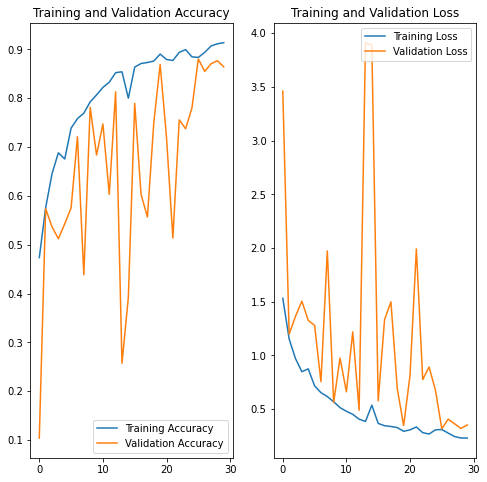

In [ ]:
##Visulise the created Model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#Analysis
As per the above data:</br>
Training Accuracy   = 0.9137</br>
Validation Accuracy = 0.8643</br>
Training Loss       = 0.2305</br>
Validation Loss     = 0.3523</br>


1. The Validation Accuracy is now improved to 0.8643 and Training Accuracy to 0.9137</br>
2. There is a significant reduction in loss of both training and Validation sets.</br>
3. The model is not overfit. Class rebalance using Augmentor has helped to solve the issue of Overfitting.</br>